# Weather Data


## Introduction
This data set includes information about a weather dataset from 2012 Jan to December.  



## Preliminary Wrangling


In [91]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.colors as col
from IPython.display import display
from pandas.api.types import CategoricalDtype
import matplotlib.dates as mdates

%matplotlib inline

In [45]:
df=pd.read_excel('weather_data.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date/Time          8784 non-null   object 
 1   Temp_C             8784 non-null   float64
 2   Dew Point Temp_C   8784 non-null   float64
 3   Rel Hum_%          8784 non-null   int64  
 4   Wind Speed_km/h    8784 non-null   int64  
 5   Visibility_km      8784 non-null   float64
 6   Press_kPa          8784 non-null   float64
 7   Weather_Condition  8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


### What is the structure of your dataset?

> The dataset has 8784 rows and 8 columns.The dataset has no null values
* Two columns are of the object datatype : Weather_Condition and Date/Time
* Four columns are of the float datatype : Temp_C,Dew Point,Visibility and Press_kpa
* Two columns are of the int datatype: Rel hum and Wind Speed

### What is/are the main feature(s) of interest in your dataset?
I would  want to know the correlation between the elements in my weather_condition  column and also I would want to know the seasons or months that experience a certain weather trend



In [46]:
df.duplicated().sum()

np.int64(0)

In [47]:
 #Rename columns
df.rename(columns={'Temp_C': 'Temp', 'Rel Hum_%': 'Humidity','Wind Speed_km/h':'Windspeed','Visibility_km':'Visibility','Dew Point Temp_C':'Dewpoint','Press_kPa':'Press'}, inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date/Time          8784 non-null   object 
 1   Temp               8784 non-null   float64
 2   Dewpoint           8784 non-null   float64
 3   Humidity           8784 non-null   int64  
 4   Windspeed          8784 non-null   int64  
 5   Visibility         8784 non-null   float64
 6   Press              8784 non-null   float64
 7   Weather_Condition  8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


There are no duplicates in the dataset

In [49]:
df['Humidity'].describe()

count    8784.000000
mean       67.431694
std        16.918881
min        18.000000
25%        56.000000
50%        68.000000
75%        81.000000
max       100.000000
Name: Humidity, dtype: float64

In [50]:
df['Windspeed'].describe()

count    8784.000000
mean       14.945469
std         8.688696
min         0.000000
25%         9.000000
50%        13.000000
75%        20.000000
max        83.000000
Name: Windspeed, dtype: float64

In [51]:
df.isna().sum()

Date/Time            0
Temp                 0
Dewpoint             0
Humidity             0
Windspeed            0
Visibility           0
Press                0
Weather_Condition    0
dtype: int64

In [52]:


# Filter only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate IQR and identify outliers
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers_iqr = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))

# Count the number of outlier values
num_outliers = outliers_iqr.sum().sum()  # Sum of all True values

print(f"Number of outlier values: {num_outliers}")

# Display rows with any outlier values
print("Rows with outliers:")
print(numeric_df[outliers_iqr.any(axis=1)])


Number of outlier values: 3910
Rows with outliers:
      Temp  Dewpoint  Humidity  Windspeed  Visibility   Press
0     -1.8      -3.9        86          4         8.0  101.24
1     -1.8      -3.7        87          4         8.0  101.24
2     -1.8      -3.4        89          7         4.0  101.26
3     -1.5      -3.2        88          6         4.0  101.27
4     -1.5      -3.3        88          7         4.8  101.23
...    ...       ...       ...        ...         ...     ...
8779   0.1      -2.7        81         30         9.7  100.13
8780   0.2      -2.4        83         24         9.7  100.03
8781  -0.5      -1.5        93         28         4.8   99.95
8782  -0.2      -1.8        89         28         9.7   99.91
8783   0.0      -2.1        86         30        11.3   99.89

[3715 rows x 6 columns]


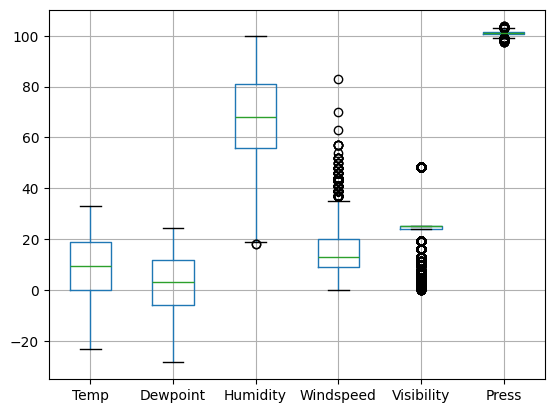

In [53]:
numeric_df.boxplot()
plt.show()

* There are 3910 outlier values in the numerical columns in the dataset

## Dealing with Outliers

In [54]:
# Replace outliers with median of the column
median_values = numeric_df.median()
imputed_numeric_df = numeric_df.where(~outliers_iqr, median_values, axis=1)


In [55]:
imputed_numeric_df.head()

,Temp,Dewpoint,Humidity,Windspeed,Visibility,Press
0,-1.8,-3.9,86,4,25.0,101.24
1,-1.8,-3.7,87,4,25.0,101.24
2,-1.8,-3.4,89,7,25.0,101.26
3,-1.5,-3.2,88,6,25.0,101.27
4,-1.5,-3.3,88,7,25.0,101.23


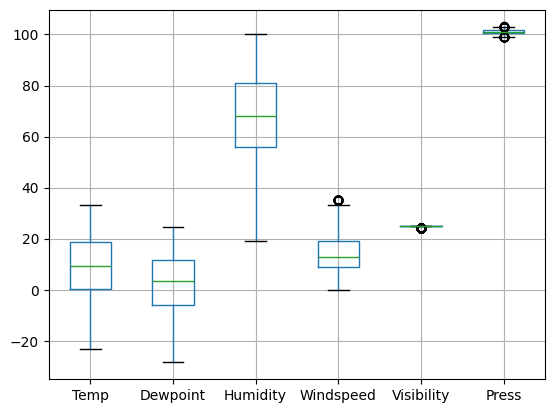

In [56]:
imputed_numeric_df.boxplot()
plt.show()

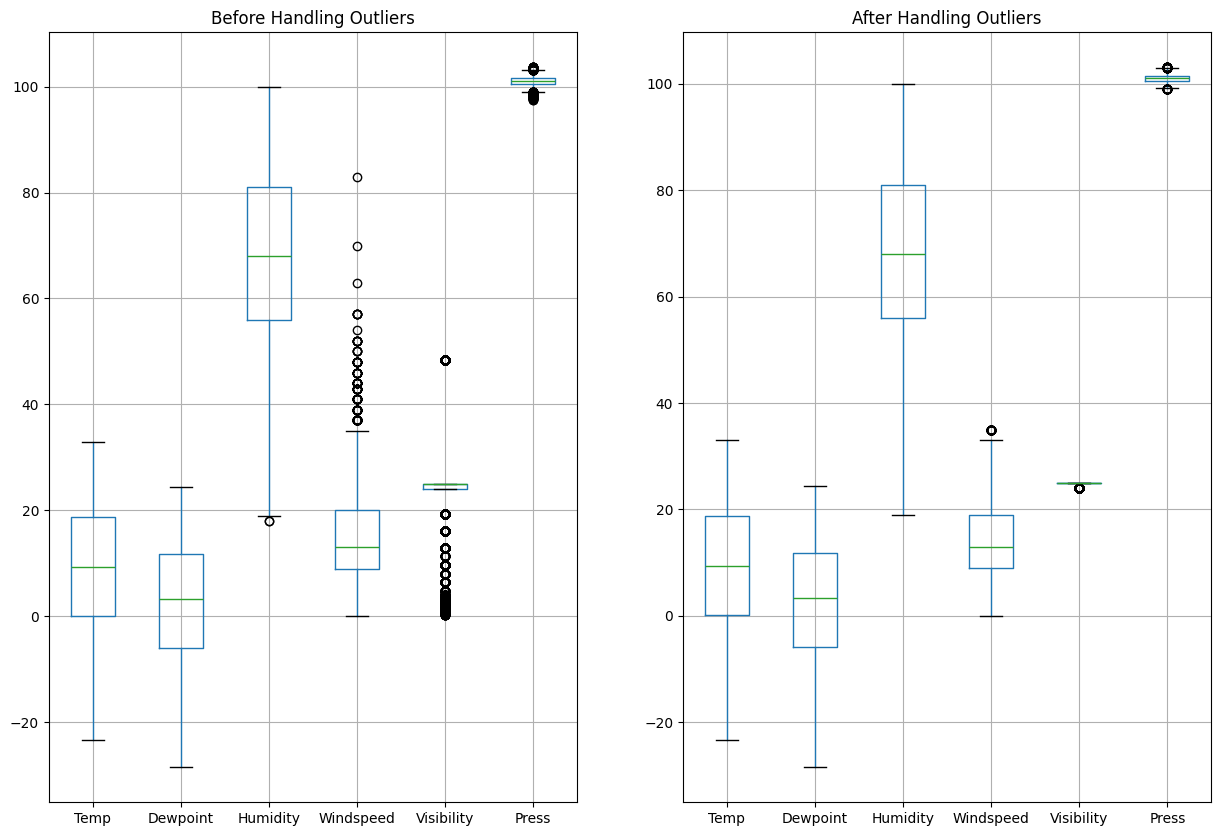

In [57]:
# Plot box plots for both original and cleaned data
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
numeric_df.boxplot()
plt.title('Before Handling Outliers')

plt.subplot(1, 2, 2)
imputed_numeric_df.boxplot()
plt.title('After Handling Outliers')

plt.show()

In [58]:
numeric_df.head()

,Temp,Dewpoint,Humidity,Windspeed,Visibility,Press
0,-1.8,-3.9,86,4,8.0,101.24
1,-1.8,-3.7,87,4,8.0,101.24
2,-1.8,-3.4,89,7,4.0,101.26
3,-1.5,-3.2,88,6,4.0,101.27
4,-1.5,-3.3,88,7,4.8,101.23


In [59]:
imputed_numeric_df.loc[:, 'id'] = range(1, len(imputed_numeric_df) + 1)


In [60]:
 #Select only the 'weather_condition' and 'id' columns
categorical_df = df[[ 'Weather_Condition','Date/Time']]

In [61]:
categorical_df.head()

,Weather_Condition,Date/Time
0,Fog,1/1/2012 0:00
1,Fog,1/1/2012 1:00
2,"Freezing Drizzle,Fog",1/1/2012 2:00
3,"Freezing Drizzle,Fog",1/1/2012 3:00
4,Fog,1/1/2012 4:00


In [62]:
categorical_df['Weather_Condition'].value_counts()

Weather_Condition
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle      

In [63]:
categorical_df.loc[:, 'id'] = range(1, len(categorical_df) + 1)


C:\Users\USER\AppData\Local\Temp\ipykernel_33296\1965682788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df.loc[:, 'id'] = range(1, len(categorical_df) + 1)


In [64]:
categorical_df.head()

,Weather_Condition,Date/Time,id
0,Fog,1/1/2012 0:00,1
1,Fog,1/1/2012 1:00,2
2,"Freezing Drizzle,Fog",1/1/2012 2:00,3
3,"Freezing Drizzle,Fog",1/1/2012 3:00,4
4,Fog,1/1/2012 4:00,5


In [65]:
imputed_numeric_df.head()

,Temp,Dewpoint,Humidity,Windspeed,Visibility,Press,id
0,-1.8,-3.9,86,4,25.0,101.24,1
1,-1.8,-3.7,87,4,25.0,101.24,2
2,-1.8,-3.4,89,7,25.0,101.26,3
3,-1.5,-3.2,88,6,25.0,101.27,4
4,-1.5,-3.3,88,7,25.0,101.23,5


In [66]:
imputed_numeric_df.shape

(8784, 7)

In [67]:
categorical_df.shape

(8784, 3)

In [68]:
## Merging dataframes
# Left merge (keep all rows from first column which is the left)
merged_df = pd.merge(imputed_numeric_df, categorical_df, on='id', how='left')

print("Left Merged DataFrame:")
print(merged_df)


Left Merged DataFrame:
      Temp  Dewpoint  Humidity  Windspeed  Visibility   Press    id  \
0     -1.8      -3.9        86          4        25.0  101.24     1   
1     -1.8      -3.7        87          4        25.0  101.24     2   
2     -1.8      -3.4        89          7        25.0  101.26     3   
3     -1.5      -3.2        88          6        25.0  101.27     4   
4     -1.5      -3.3        88          7        25.0  101.23     5   
...    ...       ...       ...        ...         ...     ...   ...   
8779   0.1      -2.7        81         30        25.0  100.13  8780   
8780   0.2      -2.4        83         24        25.0  100.03  8781   
8781  -0.5      -1.5        93         28        25.0   99.95  8782   
8782  -0.2      -1.8        89         28        25.0   99.91  8783   
8783   0.0      -2.1        86         30        25.0   99.89  8784   

         Weather_Condition         Date/Time  
0                      Fog     1/1/2012 0:00  
1                      Fog    

In [69]:
merged_df.head()

,Temp,Dewpoint,Humidity,Windspeed,Visibility,Press,id,Weather_Condition,Date/Time
0,-1.8,-3.9,86,4,25.0,101.24,1,Fog,1/1/2012 0:00
1,-1.8,-3.7,87,4,25.0,101.24,2,Fog,1/1/2012 1:00
2,-1.8,-3.4,89,7,25.0,101.26,3,"Freezing Drizzle,Fog",1/1/2012 2:00
3,-1.5,-3.2,88,6,25.0,101.27,4,"Freezing Drizzle,Fog",1/1/2012 3:00
4,-1.5,-3.3,88,7,25.0,101.23,5,Fog,1/1/2012 4:00


In [70]:
# Strip any leading/trailing spaces from the category column
merged_df['Weather_Condition'] = merged_df['Weather_Condition'].str.strip()

# Recompute frequency counts and rare categories
category_counts = merged_df['Weather_Condition'].value_counts()
rare_categories = category_counts[category_counts < 5].index

print("Updated rare categories:")
print(rare_categories)


Updated rare categories:
Index(['Freezing Rain,Fog', 'Moderate Snow', 'Rain,Snow,Ice Pellets',
       'Freezing Fog', 'Snow Showers,Fog', 'Thunderstorms,Rain Showers,Fog',
       'Thunderstorms,Rain', 'Freezing Drizzle,Haze', 'Rain,Haze',
       'Drizzle,Snow', 'Moderate Snow,Blowing Snow', 'Thunderstorms',
       'Freezing Rain,Haze', 'Rain Showers,Snow Showers',
       'Freezing Rain,Snow Grains', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Thunderstorms,Rain,Fog',
       'Freezing Rain,Ice Pellets,Fog', 'Moderate Rain,Fog', 'Rain,Snow,Fog',
       'Snow Pellets', 'Rain Showers,Fog', 'Drizzle,Ice Pellets,Fog',
       'Rain,Ice Pellets', 'Rain,Snow Grains'],
      dtype='object', name='Weather_Condition')


In [71]:
# Combine rare categories into 'Other'
merged_df['Weather_Condition'] = merged_df['Weather_Condition'].apply(lambda x: x if category_counts[x] >= 5 else 'Other')


In [72]:
merged_df['Weather_Condition'].value_counts()

Weather_Condition
Mainly Clear                  2106
Mostly Cloudy                 2069
Cloudy                        1728
Clear                         1326
Snow                           390
Rain                           306
Rain Showers                   188
Fog                            150
Rain,Fog                       116
Drizzle,Fog                     80
Snow Showers                    60
Other                           54
Drizzle                         41
Snow,Fog                        37
Snow,Blowing Snow               19
Rain,Snow                       18
Thunderstorms,Rain Showers      16
Haze                            16
Drizzle,Snow,Fog                15
Freezing Rain                   14
Freezing Drizzle,Snow           11
Freezing Drizzle                 7
Freezing Drizzle,Fog             6
Snow,Ice Pellets                 6
Snow,Haze                        5
Name: count, dtype: int64

In [73]:
merged_df.shape

(8784, 9)

In [74]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temp               8784 non-null   float64
 1   Dewpoint           8784 non-null   float64
 2   Humidity           8784 non-null   int64  
 3   Windspeed          8784 non-null   int64  
 4   Visibility         8784 non-null   float64
 5   Press              8784 non-null   float64
 6   id                 8784 non-null   int64  
 7   Weather_Condition  8784 non-null   object 
 8   Date/Time          8784 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 617.8+ KB


In [75]:
merged_df['Date/Time']=pd.to_datetime(merged_df['Date/Time'])

## Univariate Exploration


In [76]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Temp               8784 non-null   float64       
 1   Dewpoint           8784 non-null   float64       
 2   Humidity           8784 non-null   int64         
 3   Windspeed          8784 non-null   int64         
 4   Visibility         8784 non-null   float64       
 5   Press              8784 non-null   float64       
 6   id                 8784 non-null   int64         
 7   Weather_Condition  8784 non-null   object        
 8   Date/Time          8784 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 617.8+ KB


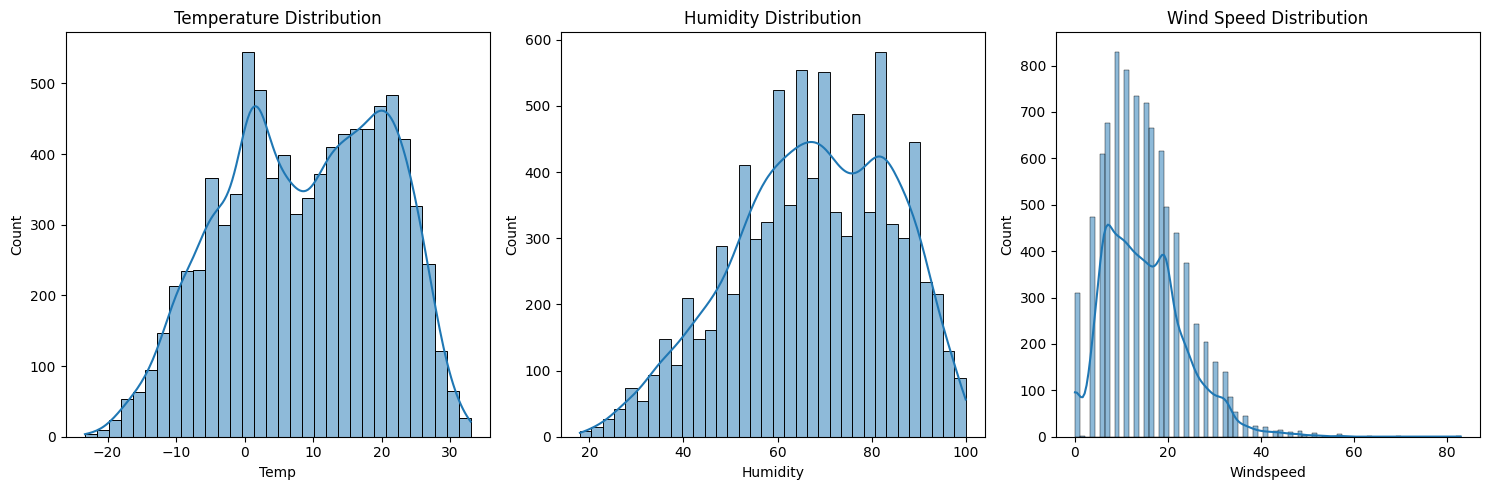

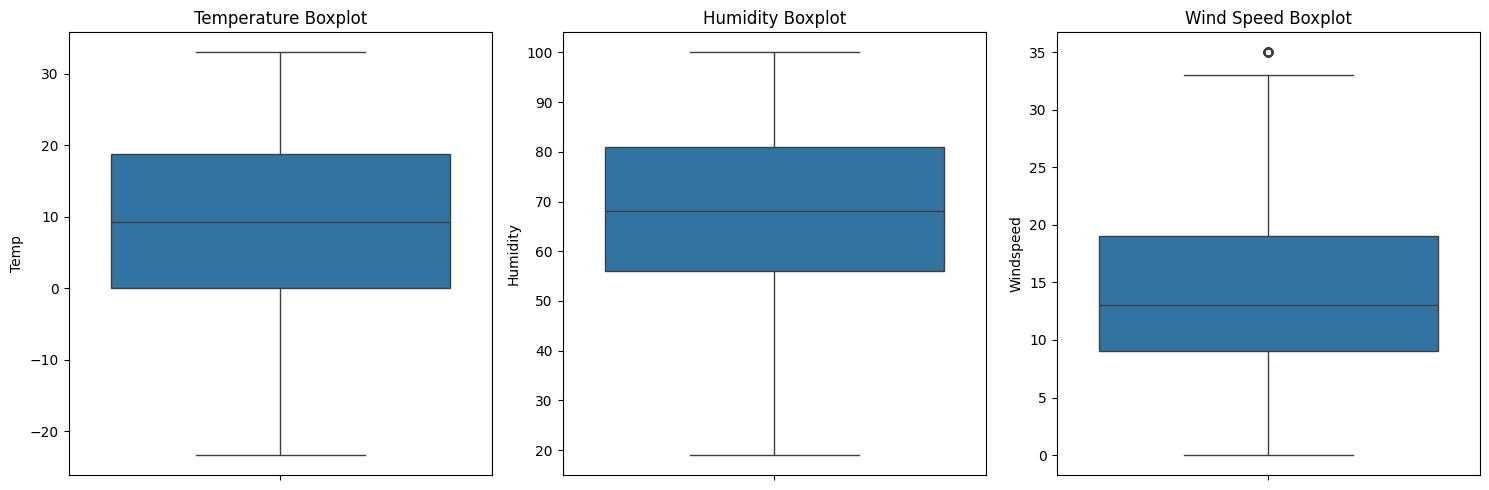

In [77]:

import seaborn as sns
import matplotlib.pyplot as plt


# Histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(merged_df['Temp'], kde=True)
plt.title('Temperature Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Humidity'], kde=True)
plt.title('Humidity Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Windspeed'], kde=True)
plt.title('Wind Speed Distribution')

plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=merged_df['Temp'])
plt.title('Temperature Boxplot')

plt.subplot(1, 3, 2)
sns.boxplot(y=merged_df['Humidity'])
plt.title('Humidity Boxplot')

plt.subplot(1, 3, 3)
sns.boxplot(y=merged_df['Windspeed'])
plt.title('Wind Speed Boxplot')

plt.tight_layout()
plt.show()


> Temperature and Humidity are Normally distributed while Windspeed appears to be skewed abit

In [78]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Temp               8784 non-null   float64       
 1   Dewpoint           8784 non-null   float64       
 2   Humidity           8784 non-null   int64         
 3   Windspeed          8784 non-null   int64         
 4   Visibility         8784 non-null   float64       
 5   Press              8784 non-null   float64       
 6   id                 8784 non-null   int64         
 7   Weather_Condition  8784 non-null   object        
 8   Date/Time          8784 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 617.8+ KB


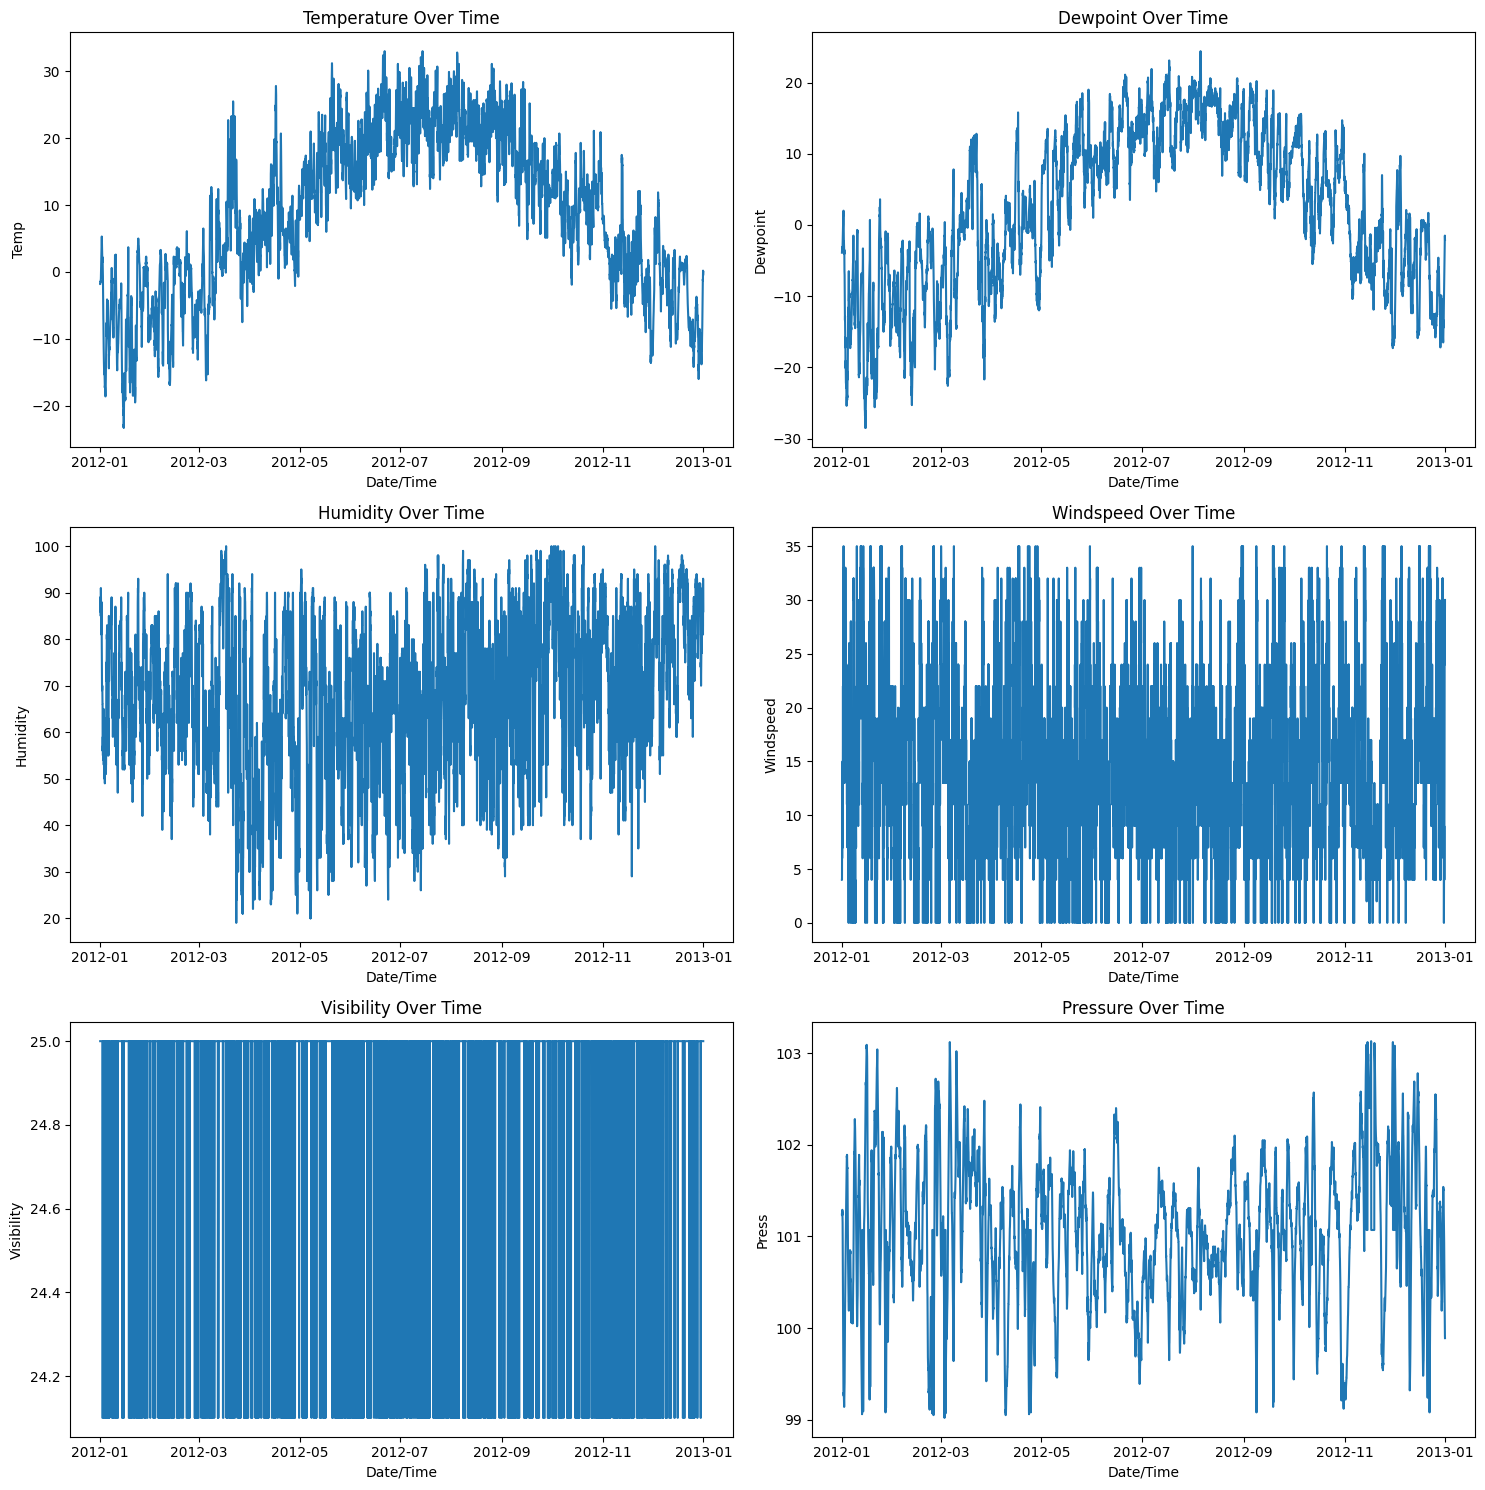

In [79]:
# Plotting time series graphs for weather parameters
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Temperature
sns.lineplot(x='Date/Time', y='Temp', data=merged_df, ax=axs[0, 0])
axs[0, 0].set_title('Temperature Over Time')

# Dewpoint
sns.lineplot(x='Date/Time', y='Dewpoint', data=merged_df, ax=axs[0, 1])
axs[0, 1].set_title('Dewpoint Over Time')

# Humidity
sns.lineplot(x='Date/Time', y='Humidity', data=merged_df, ax=axs[1, 0])
axs[1, 0].set_title('Humidity Over Time')

# Windspeed
sns.lineplot(x='Date/Time', y='Windspeed', data=merged_df, ax=axs[1, 1])
axs[1, 1].set_title('Windspeed Over Time')

# Visibility
sns.lineplot(x='Date/Time', y='Visibility', data=merged_df, ax=axs[2, 0])
axs[2, 0].set_title('Visibility Over Time')

# Pressure
sns.lineplot(x='Date/Time', y='Press', data=merged_df, ax=axs[2, 1])
axs[2, 1].set_title('Pressure Over Time')

plt.tight_layout()
plt.show()

#### From the graph above,we see that temperature and dew point  have close to the same pattern

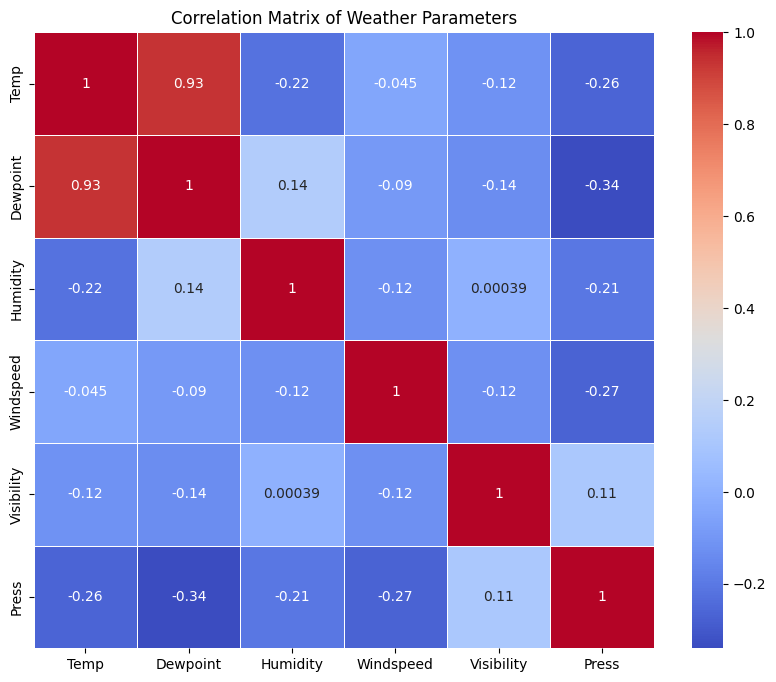

In [80]:
# Calculate the correlation matrix
correlation_matrix = merged_df[['Temp', 'Dewpoint', 'Humidity', 'Windspeed', 'Visibility', 'Press']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Weather Parameters')
plt.show()


*  Temp and Dewpoint have the highest correlation while Dewpoint and Press have the least correlation

In [83]:
# Set 'Date/Time' as the index if it is not already
merged_df.set_index('Date/Time', inplace=True)

# Select only numeric columns for resampling
df_numeric = merged_df.select_dtypes(include=['number'])

# Resample by month and calculate the mean for numeric columns
df_monthly_numeric = df_numeric.resample('M').mean()

# If needed, reset the index to include 'Date/Time' as a column
df_monthly_numeric.reset_index(inplace=True)

# Aggregating 'Weather_Condition' using mode
# Here, we use lambda to get the most frequent value (mode)
df_monthly_weather_condition = merged_df['Weather_Condition'].resample('M').agg(lambda x: x.mode()[0])

# Merge the weather condition data with the numeric monthly data
df_monthly = df_monthly_numeric.copy()
df_monthly['Weather_Condition'] = df_monthly_weather_condition.values

# Display the result
print(df_monthly.head())

   Date/Time       Temp   Dewpoint   Humidity  Windspeed  Visibility  \
0 2012-01-31  -7.371505 -12.294758  68.383065  16.763441   24.836694   
1 2012-02-29  -4.225000  -9.221695  68.956897  14.762931   24.824138   
2 2012-03-31   3.121237  -3.488575  64.930108  13.581989   24.853629   
3 2012-04-30   7.009306  -1.934583  56.150000  16.038889   24.798750   
4 2012-05-31  16.237769   8.080780  61.827957  12.846774   24.795565   

        Press      id Weather_Condition  
0  101.104032   372.5     Mostly Cloudy  
1  101.215920  1092.5            Cloudy  
2  101.380995  1812.5            Cloudy  
3  100.800097  2544.5     Mostly Cloudy  
4  101.057164  3276.5     Mostly Cloudy  


C:\Users\USER\AppData\Local\Temp\ipykernel_33296\2329304226.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_numeric = df_numeric.resample('M').mean()
C:\Users\USER\AppData\Local\Temp\ipykernel_33296\2329304226.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_weather_condition = merged_df['Weather_Condition'].resample('M').agg(lambda x: x.mode()[0])


In [88]:
# Set 'Date/Time' as the index if it is not already
df_monthly.set_index('Date/Time', inplace=True)

In [89]:
df_monthly.head()

,Temp,Dewpoint,Humidity,Windspeed,Visibility,Press,id,Weather_Condition
Date/Time,,,,,,,,
2012-01-31,-7.371505,-12.294758,68.383065,16.763441,24.836694,101.104032,372.5,Mostly Cloudy
2012-02-29,-4.225000,-9.221695,68.956897,14.762931,24.824138,101.215920,1092.5,Cloudy
2012-03-31,3.121237,-3.488575,64.930108,13.581989,24.853629,101.380995,1812.5,Cloudy
2012-04-30,7.009306,-1.934583,56.150000,16.038889,24.798750,100.800097,2544.5,Mostly Cloudy
2012-05-31,16.237769,8.080780,61.827957,12.846774,24.795565,101.057164,3276.5,Mostly Cloudy


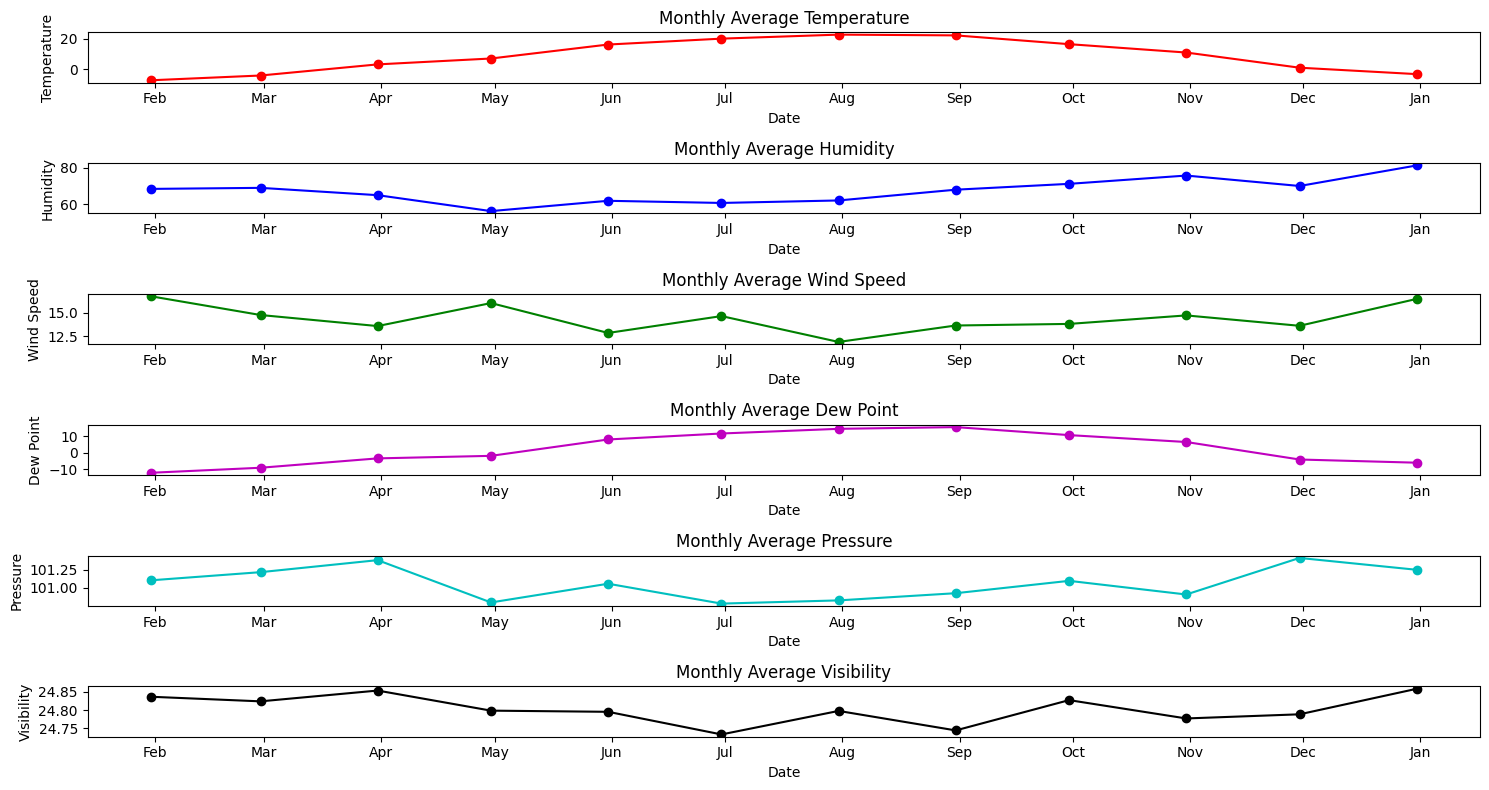

In [96]:
# Plot time series for monthly data
plt.figure(figsize=(15, 8))
# Plot Temperature
plt.subplot(6, 1, 1)
plt.plot(df_monthly.index, df_monthly['Temp'], color='r', marker='o')
plt.title('Monthly Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Show only month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())         # Place tick marks at the start of each month

# Plot Humidity
plt.subplot(6, 1, 2)
plt.plot(df_monthly.index, df_monthly['Humidity'], color='b', marker='o')
plt.title('Monthly Average Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Show only month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())         # Place tick marks at the start of each month

# Plot Wind Speed
plt.subplot(6, 1, 3)
plt.plot(df_monthly.index, df_monthly['Windspeed'], color='g', marker='o')
plt.title('Monthly Average Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Show only month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())         # Place tick marks at the start of each month

# Plot Dew Point
plt.subplot(6, 1, 4)
plt.plot(df_monthly.index, df_monthly['Dewpoint'], color='m', marker='o')
plt.title('Monthly Average Dew Point')
plt.xlabel('Date')
plt.ylabel('Dew Point')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Show only month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())         # Place tick marks at the start of each month

# Plot Pressure
plt.subplot(6, 1, 5)
plt.plot(df_monthly.index, df_monthly['Press'], color='c', marker='o')
plt.title('Monthly Average Pressure')
plt.xlabel('Date')
plt.ylabel('Pressure')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Show only month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())         # Place tick marks at the start of each month

# Plot Visibility
plt.subplot(6, 1, 6)
plt.plot(df_monthly.index, df_monthly['Visibility'], color='k', marker='o')
plt.title('Monthly Average Visibility')
plt.xlabel('Date')
plt.ylabel('Visibility')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Show only month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())         # Place tick marks at the start of each month

plt.tight_layout()
plt.show()

> August Experienced the highest temperatures while in terms of wind speed,it was at it's least in August

In [97]:
df_monthly.head()

,Temp,Dewpoint,Humidity,Windspeed,Visibility,Press,id,Weather_Condition
Date/Time,,,,,,,,
2012-01-31,-7.371505,-12.294758,68.383065,16.763441,24.836694,101.104032,372.5,Mostly Cloudy
2012-02-29,-4.225000,-9.221695,68.956897,14.762931,24.824138,101.215920,1092.5,Cloudy
2012-03-31,3.121237,-3.488575,64.930108,13.581989,24.853629,101.380995,1812.5,Cloudy
2012-04-30,7.009306,-1.934583,56.150000,16.038889,24.798750,100.800097,2544.5,Mostly Cloudy
2012-05-31,16.237769,8.080780,61.827957,12.846774,24.795565,101.057164,3276.5,Mostly Cloudy
